# 🚜predicting the sale price of bulldozer using machine learning model

## 1.Problem Defination
> how well we can predict the future sale price of bulldozar from the previous data.

## 2.Data
the data is downloaded from kaggle bluebook for bulldozers competition:https://www.kaggle.com/c/bluebook-for-bulldozers/overview
 
this data has mainly 3 datasets
 
* Train.csv is the training set, which contains data through the end of 2011.
* Valid.csv is the validation set, which contains data from January 1, 2012 - April 30, 2012 You make predictions on this set throughout the majority of the competition. Your score on this set is used to create the public leaderboard.
* Test.csv is the test set, which won't be released until the last week of the competition. It contains data from May 1, 2012 - November 2012. Your score on the test set determines your final rank for the competition.

## 3.Evaluation

The evaluation metric for this competition is the RMSLE (root mean squared log error) between the actual and predicted auction prices.

for more on the evaluation of this project check:https://www.kaggle.com/c/bluebook-for-bulldozers/overview/evaluation

our goal for this project is to bulid machine learning model which minimises RMSLE.

## 4.Features

kaggle provides a data dictionary detailing the all of the features of datasets. you can view at

In [1]:
#importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn

In [2]:
#import training and validation sets:
df=pd.read_csv('bluebook-for-bulldozers/TrainAndValid.csv',low_memory=False)

In [3]:
df.isna().sum()

SalesID                          0
SalePrice                        0
MachineID                        0
ModelID                          0
datasource                       0
auctioneerID                 20136
YearMade                         0
MachineHoursCurrentMeter    265194
UsageBand                   339028
saledate                         0
fiModelDesc                      0
fiBaseModel                      0
fiSecondaryDesc             140727
fiModelSeries               354031
fiModelDescriptor           337882
ProductSize                 216605
fiProductClassDesc               0
state                            0
ProductGroup                     0
ProductGroupDesc                 0
Drive_System                305611
Enclosure                      334
Forks                       214983
Pad_Type                    331602
Ride_Control                259970
Stick                       331602
Transmission                224691
Turbocharged                331602
Blade_Extension     

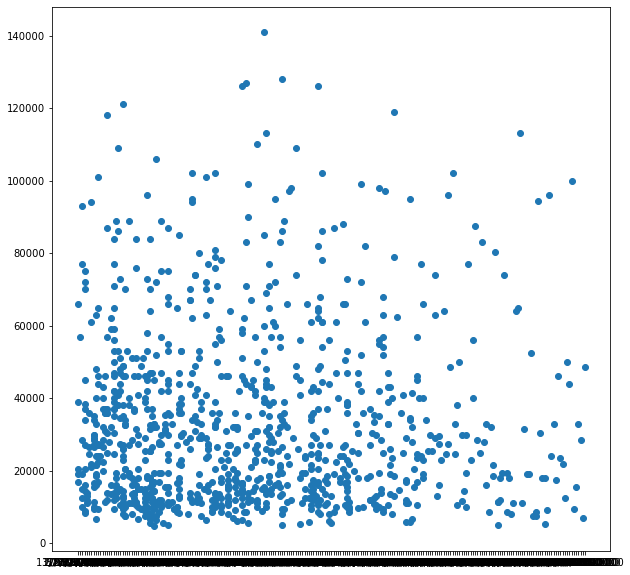

In [4]:
fig,ax=plt.subplots(figsize=(10,10))
ax.scatter(df['saledate'][:1000],df['SalePrice'][:1000]);

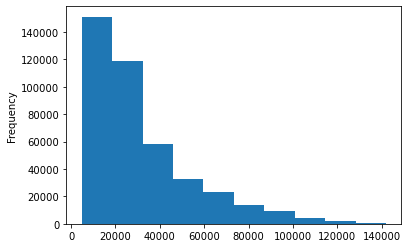

In [5]:
df.SalePrice.plot.hist();

# parsing dates

when we work with time series data,we want to enrich the time and date component as much as possible.

we can do that by telling which of our columns has dates in it using the `parse_dates` parameter

In [6]:
# import the data again but this time parse dates
df=pd.read_csv("bluebook-for-bulldozers/TrainAndValid.csv",low_memory=False,parse_dates=['saledate'])

In [7]:
df.saledate

0        2006-11-16
1        2004-03-26
2        2004-02-26
3        2011-05-19
4        2009-07-23
            ...    
412693   2012-03-07
412694   2012-01-28
412695   2012-01-28
412696   2012-03-07
412697   2012-01-28
Name: saledate, Length: 412698, dtype: datetime64[ns]

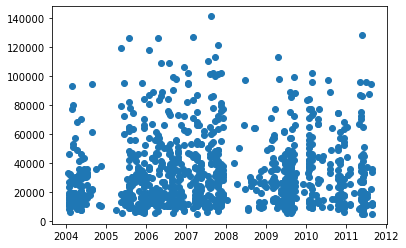

In [8]:
fig,ax=plt.subplots()
ax.scatter(df['saledate'][:1000],df['SalePrice'][:1000])

# sorting dates in ascending order

In [10]:
df.sort_values(by=['saledate'],inplace=True,ascending=True)
df.head()

,SalesID,SalePrice,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,saledate,...,Undercarriage_Pad_Width,Stick_Length,Thumb,Pattern_Changer,Grouser_Type,Backhoe_Mounting,Blade_Type,Travel_Controls,Differential_Type,Steering_Controls
205615,1646770,9500.0,1126363,8434,132,18.0,1974,NaN,NaN,1989-01-17,...,NaN,NaN,NaN,NaN,NaN,None or Unspecified,Straight,None or Unspecified,NaN,NaN
274835,1821514,14000.0,1194089,10150,132,99.0,1980,NaN,NaN,1989-01-31,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Standard,Conventional
141296,1505138,50000.0,1473654,4139,132,99.0,1978,NaN,NaN,1989-01-31,...,NaN,NaN,NaN,NaN,NaN,None or Unspecified,Straight,None or Unspecified,NaN,NaN
212552,1671174,16000.0,1327630,8591,132,99.0,1980,NaN,NaN,1989-01-31,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Standard,Conventional
62755,1329056,22000.0,1336053,4089,132,99.0,1984,NaN,NaN,1989-01-31,...,NaN,NaN,NaN,NaN,NaN,None or Unspecified,PAT,Lever,NaN,NaN


In [11]:
#make a copy
df_tem=df.copy()

# add date time parameter for `sale date` column

In [12]:
df_tem['saleyear']=df_tem.saledate.dt.year
df_tem['salemonth']=df_tem.saledate.dt.month
df_tem['saleday']=df_tem.saledate.dt.day
df_tem['saledayofweek']=df_tem.saledate.dt.dayofweek
df_tem['saledayofyear']=df_tem.saledate.dt.dayofyear

In [13]:
df_tem.head().T

,205615,274835,141296,212552,62755
SalesID,1646770,1821514,1505138,1671174,1329056
SalePrice,9500,14000,50000,16000,22000
MachineID,1126363,1194089,1473654,1327630,1336053
ModelID,8434,10150,4139,8591,4089
datasource,132,132,132,132,132
auctioneerID,18,99,99,99,99
YearMade,1974,1980,1978,1980,1984
MachineHoursCurrentMeter,NaN,NaN,NaN,NaN,NaN
UsageBand,NaN,NaN,NaN,NaN,NaN
saledate,1989-01-17 00:00:00,1989-01-31 00:00:00,1989-01-31 00:00:00,1989-01-31 00:00:00,1989-01-31 00:00:00


In [14]:
# now we enriched with date time feature, we are removing saledate column from dataframe
df_tem.drop('saledate',axis=1,inplace=True)

In [15]:
df_tem.state.value_counts()

Florida           67320
Texas             53110
California        29761
Washington        16222
Georgia           14633
Maryland          13322
Mississippi       13240
Ohio              12369
Illinois          11540
Colorado          11529
New Jersey        11156
North Carolina    10636
Tennessee         10298
Alabama           10292
Pennsylvania      10234
South Carolina     9951
Arizona            9364
New York           8639
Connecticut        8276
Minnesota          7885
Missouri           7178
Nevada             6932
Louisiana          6627
Kentucky           5351
Maine              5096
Indiana            4124
Arkansas           3933
New Mexico         3631
Utah               3046
Unspecified        2801
Wisconsin          2745
New Hampshire      2738
Virginia           2353
Idaho              2025
Oregon             1911
Michigan           1831
Wyoming            1672
Iowa               1336
Montana            1336
Oklahoma           1326
Nebraska            866
West Virginia   

# convert strings into categories

one way is to convert all strings into numbers by using pandas api

In [16]:
pd.api.types.is_string_dtype(df_tem['UsageBand'])

True

In [17]:
# find the column which contains strings
for label, content in df_tem.items():
    if pd.api.types.is_string_dtype(content):
        print(label)


UsageBand
fiModelDesc
fiBaseModel
fiSecondaryDesc
fiModelSeries
fiModelDescriptor
ProductSize
fiProductClassDesc
state
ProductGroup
ProductGroupDesc
Drive_System
Enclosure
Forks
Pad_Type
Ride_Control
Stick
Transmission
Turbocharged
Blade_Extension
Blade_Width
Enclosure_Type
Engine_Horsepower
Hydraulics
Pushblock
Ripper
Scarifier
Tip_Control
Tire_Size
Coupler
Coupler_System
Grouser_Tracks
Hydraulics_Flow
Track_Type
Undercarriage_Pad_Width
Stick_Length
Thumb
Pattern_Changer
Grouser_Type
Backhoe_Mounting
Blade_Type
Travel_Controls
Differential_Type
Steering_Controls


In [18]:
# this will turn all of the strings values into categories
for label,content in df_tem.items():
    if pd.api.types.is_string_dtype(content):
        df_tem[label]=content.astype('category').cat.as_ordered()

In [19]:
df_tem.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 412698 entries, 205615 to 409203
Data columns (total 57 columns):
 #   Column                    Non-Null Count   Dtype   
---  ------                    --------------   -----   
 0   SalesID                   412698 non-null  int64   
 1   SalePrice                 412698 non-null  float64 
 2   MachineID                 412698 non-null  int64   
 3   ModelID                   412698 non-null  int64   
 4   datasource                412698 non-null  int64   
 5   auctioneerID              392562 non-null  float64 
 6   YearMade                  412698 non-null  int64   
 7   MachineHoursCurrentMeter  147504 non-null  float64 
 8   UsageBand                 73670 non-null   category
 9   fiModelDesc               412698 non-null  category
 10  fiBaseModel               412698 non-null  category
 11  fiSecondaryDesc           271971 non-null  category
 12  fiModelSeries             58667 non-null   category
 13  fiModelDescriptor       

In [20]:
df_tem.state.cat.codes

205615    43
274835     8
141296     8
212552     8
62755      8
          ..
410879     4
412476     4
411927     4
407124     4
409203     4
Length: 412698, dtype: int8

# save processed data

In [21]:
df_tem.to_csv('bluebook-for-bulldozers/train_tmp.csv',index=False)

# fill missing values

*we are going to fill numeric values first

In [22]:
for label,content in df_tem.items():
    if pd.api.types.is_numeric_dtype(content):
        print(label)

SalesID
SalePrice
MachineID
ModelID
datasource
auctioneerID
YearMade
MachineHoursCurrentMeter
saleyear
salemonth
saleday
saledayofweek
saledayofyear


In [23]:
df_tem.ModelID

205615     8434
274835    10150
141296     4139
212552     8591
62755      4089
          ...  
410879     5266
412476    19330
411927    17244
407124     3357
409203     4701
Name: ModelID, Length: 412698, dtype: int64

In [24]:
# check for which column have null values
for label,content in df_tem.items():
    if pd.api.types.is_numeric_dtype(content):
        if pd.isnull(content).sum():
            print(label)

auctioneerID
MachineHoursCurrentMeter


In [25]:
#filling column with median value 
for label,content in df_tem.items():
    if pd.api.types.is_numeric_dtype(content):
        if pd.isnull(content).sum():
            #add a binary column which tells us if the data is missing or not
            df_tem[label+'_is_missing']=pd.isnull(content)
            #fill missing values with median
            df_tem[label]=content.fillna(content.median())

In [26]:
pd.Categorical(df_tem['state']).codes

array([43,  8,  8, ...,  4,  4,  4], dtype=int8)

In [27]:
pd.Categorical(df_tem['state']).codes+1

array([44,  9,  9, ...,  5,  5,  5], dtype=int8)

In [28]:
# turn categorical values into numbers and fill missing
for label,content in df_tem.items():
    if not pd.api.types.is_numeric_dtype(content):
        # add binary column wheter sample has missing values or not
        df_tem[label+'_is_missing']=pd.isnull(content)
        #turn categories into numbers and add 1
        df_tem[label]=pd.Categorical(content).codes+1

In [29]:
df_tem.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 412698 entries, 205615 to 409203
Columns: 103 entries, SalesID to Steering_Controls_is_missing
dtypes: bool(46), float64(3), int16(4), int64(10), int8(40)
memory usage: 81.1 MB


In [30]:
df_tem.isna().sum()

SalesID                         0
SalePrice                       0
MachineID                       0
ModelID                         0
datasource                      0
                               ..
Backhoe_Mounting_is_missing     0
Blade_Type_is_missing           0
Travel_Controls_is_missing      0
Differential_Type_is_missing    0
Steering_Controls_is_missing    0
Length: 103, dtype: int64

# spilting data for training and validation

so we are creating our own training and validation data according to competition guidelines

In [31]:
# split data into training and validation
df_val=df_tem[df_tem['saleyear']==2012]
df_train=df_tem[df_tem['saleyear']!=2012]

len(df_val),len(df_train)

(11573, 401125)

In [32]:
# split data into x&y
x_train,y_train=df_train.drop('SalePrice',axis=1),df_train.SalePrice
x_valid,y_valid=df_val.drop('SalePrice',axis=1),df_val.SalePrice
x_train.shape,y_train.shape,x_valid.shape,y_valid.shape

((401125, 102), (401125,), (11573, 102), (11573,))

# building an evaluation function

In [33]:
#creating evaluation function(RMSLE)
from sklearn.metrics import mean_squared_log_error,mean_absolute_error,r2_score
def rsmle(y_test , y_pred):
    """"
    calculates root mean squared log error between predictions and true labels
    """
    
    return np.sqrt(mean_squared_log_error(y_test,y_pred))
# create function to evaluate model on different parameters
def show_scores(model):
    train_preds=model.predict(x_train)
    val_preds=model.predict(x_valid)
    scores={'training mae':mean_absolute_error(y_train, train_preds),
           'valid mae':mean_absolute_error(y_valid,val_preds),
           'training rmsle':rsmle(y_train,train_preds),
           'valid rmsle':rsmle(y_valid,val_preds),
           'training r2':r2_score(y_train,train_preds),
           'valid r2':r2_score(y_valid,val_preds)}
    return scores

# training our model on subset of data (for hyper parameter tunning)

In [38]:
# change max sample values
from sklearn.ensemble import RandomForestRegressor
model=RandomForestRegressor(n_jobs=-1,random_state=97,max_samples=10000)


In [39]:
%%time
# lets see how much time we actullay saved it
model.fit(x_train,y_train)

Wall time: 14.7 s


RandomForestRegressor(max_samples=10000, n_jobs=-1, random_state=97)

In [40]:
show_scores(model)

{'training mae': 5558.166802243688,
 'valid mae': 7152.544363604943,
 'training rmsle': 0.2580131476247035,
 'valid rmsle': 0.2925549472232777,
 'training r2': 0.860762325324439,
 'valid r2': 0.8334107136922801}

# hyper parameters tunning using randomized search cv

In [41]:
%%time
from sklearn.model_selection import RandomizedSearchCV

# different random forest regressor hyperparameters
rf_grid={'n_estimators':np.arange(10,100,10),
        'max_depth':[None,3,5,10],
        'min_samples_split':np.arange(2,20,2),
        'min_samples_leaf':np.arange(1,20,2),
        'max_features':[.5,1,'auto','sqrt'],
        'max_samples':[10000]}
# initiate random search cv model
rs_model=RandomizedSearchCV(RandomForestRegressor(n_jobs=-1,random_state=97),
                                                  param_distributions=rf_grid,
                                                  n_iter=2,cv=5,verbose=True)
#fit model to data
rs_model.fit(x_train,y_train)


Fitting 5 folds for each of 2 candidates, totalling 10 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:   34.7s finished


Wall time: 37.2 s


RandomizedSearchCV(cv=5,
                   estimator=RandomForestRegressor(n_jobs=-1, random_state=97),
                   n_iter=2,
                   param_distributions={'max_depth': [None, 3, 5, 10],
                                        'max_features': [0.5, 1, 'auto',
                                                         'sqrt'],
                                        'max_samples': [10000],
                                        'min_samples_leaf': array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19]),
                                        'min_samples_split': array([ 2,  4,  6,  8, 10, 12, 14, 16, 18]),
                                        'n_estimators': array([10, 20, 30, 40, 50, 60, 70, 80, 90])},
                   verbose=True)

In [42]:
#finding best model parameters
rs_model.best_params_

{'n_estimators': 10,
 'min_samples_split': 12,
 'min_samples_leaf': 17,
 'max_samples': 10000,
 'max_features': 'auto',
 'max_depth': 3}

In [43]:
#evaluate the randomized search model
show_scores(rs_model)

{'training mae': 11633.016022785006,
 'valid mae': 13128.374656622478,
 'training rmsle': 0.4952962352993951,
 'valid rmsle': 0.49725005572372094,
 'training r2': 0.49806904352014303,
 'valid r2': 0.5001495780882459}

# train model with best hyperparameters

* these parameters are founded by doing 100 iterations in randomized search cv

In [44]:
%%time
# most ideal hyperparameters

ideal_model=RandomForestRegressor(n_estimators=40,
                                 min_samples_leaf=1,
                                 min_samples_split=14,
                                 max_features=0.5,
                                 n_jobs=-1,
                                 max_samples=None,
                                 random_state=97)

# fit the ideal model
ideal_model.fit(x_train, y_train)

Wall time: 1min 15s


RandomForestRegressor(max_features=0.5, min_samples_split=14, n_estimators=40,
                      n_jobs=-1, random_state=97)

In [45]:
show_scores(ideal_model)


{'training mae': 2951.411792578619,
 'valid mae': 5942.964199248988,
 'training rmsle': 0.1443902456309788,
 'valid rmsle': 0.24632588894550067,
 'training r2': 0.9589562502626605,
 'valid r2': 0.8823782747911019}

# predicting results with test set

* when we imported our test and fitted to ideal model it shows error because the format of test set is not similar as of our train set.
* in training set we done some conversion on data.
 1) created  different features from `saledate`.
 2) converted object data type into `numerical type` & `categorical type`.
 3) and fill the `na` values present in the data.

In [46]:
test_df=pd.read_csv('bluebook-for-bulldozers/Test.csv',low_memory=False,parse_dates=['saledate'])

#  we are doing manipulations on test data

* converting into same format as our training data.

In [47]:
def preprocess_data(df):
    """"
    transforming test_df into transformed_test_df
    
    """
    df['saleyear']=df.saledate.dt.year
    df['salemonth']=df.saledate.dt.month
    df['saleday']=df.saledate.dt.day
    df['saledayofweek']=df.saledate.dt.dayofweek
    df['saledayofyear']=df.saledate.dt.dayofyear
    
    df.drop('saledate',axis=1,inplace=True)
    
    #fill numeric rows with median
    for label,content in df.items():
        if pd.api.types.is_numeric_dtype(content):
            if pd.isnull(content).sum():
            #add a binary column which tells us if the data is missing or not
                df[label+'_is_missing']=pd.isnull(content)
                #fill missing values with median
                df[label]=content.fillna(content.median())
            
                #filled categorical missing data and converting categorical into numerical
        if not pd.api.types.is_numeric_dtype(content):
        # add binary column wheter sample has missing values or not
            df[label+'_is_missing']=pd.isnull(content)
        #turn categories into numbers and add 1
            df[label]=pd.Categorical(content).codes+1
                
    return df

In [48]:
test_df=preprocess_data(test_df)

In [49]:
test_df

,SalesID,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,fiModelDesc,fiBaseModel,...,Undercarriage_Pad_Width_is_missing,Stick_Length_is_missing,Thumb_is_missing,Pattern_Changer_is_missing,Grouser_Type_is_missing,Backhoe_Mounting_is_missing,Blade_Type_is_missing,Travel_Controls_is_missing,Differential_Type_is_missing,Steering_Controls_is_missing
0,1227829,1006309,3168,121,3,1999,3688.0,2,499,180,...,True,True,True,True,True,True,True,True,True,True
1,1227844,1022817,7271,121,3,1000,28555.0,1,831,292,...,True,True,True,True,True,True,True,True,False,False
2,1227847,1031560,22805,121,3,2004,6038.0,3,1177,404,...,False,False,False,False,False,True,True,True,True,True
3,1227848,56204,1269,121,3,2006,8940.0,1,287,113,...,False,False,False,False,False,True,True,True,True,True
4,1227863,1053887,22312,121,3,2005,2286.0,2,566,196,...,True,True,True,True,True,False,False,False,True,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12452,6643171,2558317,21450,149,2,2008,3525.0,0,713,235,...,False,False,False,False,False,True,True,True,True,True
12453,6643173,2558332,21434,149,2,2005,3525.0,0,186,80,...,False,False,False,False,False,True,True,True,True,True
12454,6643184,2558342,21437,149,2,1000,3525.0,0,325,123,...,False,False,False,False,False,True,True,True,True,True
12455,6643186,2558343,21437,149,2,2006,3525.0,0,325,123,...,False,False,False,False,False,True,True,True,True,True


In [50]:
x_train.head()

,SalesID,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,fiModelDesc,fiBaseModel,...,Undercarriage_Pad_Width_is_missing,Stick_Length_is_missing,Thumb_is_missing,Pattern_Changer_is_missing,Grouser_Type_is_missing,Backhoe_Mounting_is_missing,Blade_Type_is_missing,Travel_Controls_is_missing,Differential_Type_is_missing,Steering_Controls_is_missing
205615,1646770,1126363,8434,132,18.0,1974,0.0,0,4593,1744,...,True,True,True,True,True,False,False,False,True,True
274835,1821514,1194089,10150,132,99.0,1980,0.0,0,1820,559,...,True,True,True,True,True,True,True,True,False,False
141296,1505138,1473654,4139,132,99.0,1978,0.0,0,2348,713,...,True,True,True,True,True,False,False,False,True,True
212552,1671174,1327630,8591,132,99.0,1980,0.0,0,1819,558,...,True,True,True,True,True,True,True,True,False,False
62755,1329056,1336053,4089,132,99.0,1984,0.0,0,2119,683,...,True,True,True,True,True,False,False,False,True,True


In [51]:
#we are finding missing column by using sets
set(x_train.columns)-set(test_df.columns)

{'auctioneerID_is_missing'}

In [52]:
#manually adjusted test_df to have'auctioneerID_is_missing'
test_df['auctioneerID_is_missing']=False
test_df

,SalesID,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,fiModelDesc,fiBaseModel,...,Stick_Length_is_missing,Thumb_is_missing,Pattern_Changer_is_missing,Grouser_Type_is_missing,Backhoe_Mounting_is_missing,Blade_Type_is_missing,Travel_Controls_is_missing,Differential_Type_is_missing,Steering_Controls_is_missing,auctioneerID_is_missing
0,1227829,1006309,3168,121,3,1999,3688.0,2,499,180,...,True,True,True,True,True,True,True,True,True,False
1,1227844,1022817,7271,121,3,1000,28555.0,1,831,292,...,True,True,True,True,True,True,True,False,False,False
2,1227847,1031560,22805,121,3,2004,6038.0,3,1177,404,...,False,False,False,False,True,True,True,True,True,False
3,1227848,56204,1269,121,3,2006,8940.0,1,287,113,...,False,False,False,False,True,True,True,True,True,False
4,1227863,1053887,22312,121,3,2005,2286.0,2,566,196,...,True,True,True,True,False,False,False,True,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12452,6643171,2558317,21450,149,2,2008,3525.0,0,713,235,...,False,False,False,False,True,True,True,True,True,False
12453,6643173,2558332,21434,149,2,2005,3525.0,0,186,80,...,False,False,False,False,True,True,True,True,True,False
12454,6643184,2558342,21437,149,2,1000,3525.0,0,325,123,...,False,False,False,False,True,True,True,True,True,False
12455,6643186,2558343,21437,149,2,2006,3525.0,0,325,123,...,False,False,False,False,True,True,True,True,True,False


* finally our test data has same featues as train data.so lets predict the results

In [53]:
#predicting results
test_pred=ideal_model.predict(test_df)

In [54]:
len(test_pred)

12457

* but kaggle is asking in differnt type so we formatting our predictions into different types

In [55]:
df_pred=pd.DataFrame()
df_pred["SalesID"]=test_df["SalesID"]
df_pred['SalesPrice']=test_pred
df_pred

,SalesID,SalesPrice
0,1227829,21013.223273
1,1227844,23361.773367
2,1227847,51885.502607
3,1227848,65110.037930
4,1227863,37132.257758
...,...,...
12452,6643171,46005.813275
12453,6643173,16083.265505
12454,6643184,15093.759651
12455,6643186,19650.848481


In [56]:
# export into csv
df_pred.to_csv("bluebook-for-bulldozers/my_predictions.csv",index=False)

# feature importance

we predicting the results with using different attributes of the data, but we need to find which attribute affected most predictions.so for this we are using feature selection

In [57]:
ideal_model.feature_importances_

array([3.28487576e-02, 2.28962683e-02, 4.40962034e-02, 1.80545168e-03,
       3.34893027e-03, 2.03372571e-01, 3.13029611e-03, 1.02303670e-03,
       4.31010590e-02, 4.56776632e-02, 6.06054888e-02, 4.42504370e-03,
       1.39797175e-02, 1.31183615e-01, 4.35195421e-02, 5.95163406e-03,
       2.12041374e-03, 3.83380407e-03, 2.93650802e-03, 6.06713063e-02,
       4.27273303e-04, 3.97706082e-05, 8.86540496e-04, 1.79706955e-04,
       1.14566806e-03, 3.02072599e-04, 1.97211575e-03, 8.71522142e-03,
       2.18766185e-04, 5.79029139e-04, 4.54229587e-03, 1.54926715e-03,
       4.43165580e-03, 2.98435618e-04, 7.44708218e-04, 1.45838831e-02,
       7.65307448e-04, 1.52417575e-02, 8.28118247e-04, 1.92952540e-03,
       4.77399301e-04, 1.26573563e-03, 1.81840356e-03, 5.57752856e-04,
       4.43918109e-04, 3.51000163e-04, 2.98505791e-04, 2.43966144e-03,
       1.42663770e-03, 4.79562218e-04, 1.91003777e-04, 7.44640824e-02,
       3.80934746e-03, 5.58714650e-03, 2.91640938e-03, 9.98941602e-03,
      

In [58]:
len(ideal_model.feature_importances_)

102

In [59]:
x_train.shape

(401125, 102)

In [60]:
# creating helper fuction for visiualling feature importance
def plot_features(columns,importances,n=20):
    df=(pd.DataFrame({'features':columns,
                    'feature_importances':importances,})
    .sort_values('feature_importances', ascending=False)
    .reset_index(drop=True))
    
    #plot features
    fig,ax=plt.subplots(figsize=(10,10))
    ax.barh(df['features'][:n],df['feature_importances'][:20])
    ax.set_ylabel('features')
    ax.set_xlabel('feature importance')
    ax.invert_yaxis()

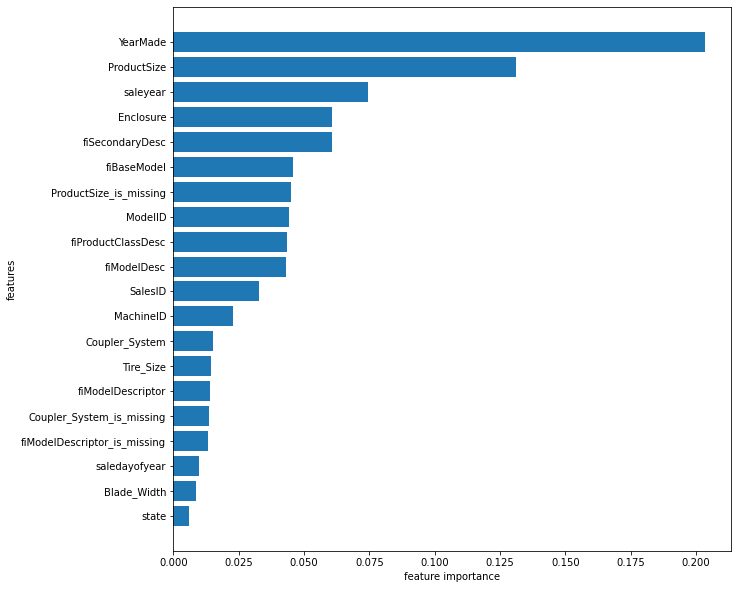

In [61]:
plot_features(x_train.columns,ideal_model.feature_importances_)